In [1]:
# This notebook will be used for Capstone Data Science Coursera final project

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import dateutil
import matplotlib as mpl
import seaborn as sns
from datetime import datetime
mpl.style.use('ggplot') 
%matplotlib inline

In [3]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [4]:
#1. Description & Disscusion of the Background
#With the global pandemic of Covid -19 in this year that has strike the world,
#i decide to made the final project to show the advance 
#through the data collected from my country.

In [5]:
#2. Data Description
#In this process I was able to get data from my country.


In [6]:
#Uruguay Data
!wget https://raw.githubusercontent.com/GUIAD-COVID/datos-y-visualizaciones-GUIAD/master/datos/estadisticasUY.csv

--2020-08-28 12:18:10--  https://raw.githubusercontent.com/GUIAD-COVID/datos-y-visualizaciones-GUIAD/master/datos/estadisticasUY.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.216.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.216.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11425 (11K) [text/plain]
Saving to: ‘estadisticasUY.csv.1’

estadisticasUY.csv. 100%[===================>]  11,16K  --.-KB/s    in 0s      

2020-08-28 12:18:11 (33,8 MB/s) - ‘estadisticasUY.csv.1’ saved [11425/11425]



In [7]:
#Download CSV and made a df, is in Spanish but names will be traducted to English
df_U= pd.read_csv("estadisticasUY.csv")
df_U = df_U.fillna(0)
df_U.head()


,fecha,dia,cantPersonasConInfeccionEnCurso,cantCasosNuevos,acumCasos,cantFallecidos,acumFallecidos,cantCTI,cantCI,cantRecuperados,acumRecuperados,cantTest,acumTest,cantTestPositivos,acumTestPositivos,DIA
0,13/03/2020,1,4,0.0,4,0,0,0.0,0.0,0,0,0.0,0.0,4,4,5_VIERNES
1,14/03/2020,2,6,2.0,6,0,0,0.0,0.0,0,0,0.0,0.0,2,6,6_SABADO
2,15/03/2020,3,8,2.0,8,0,0,0.0,0.0,0,0,0.0,0.0,2,8,7_DOMINGO
3,16/03/2020,4,29,21.0,29,0,0,0.0,0.0,0,0,0.0,0.0,21,29,1_LUNES
4,17/03/2020,5,50,21.0,50,0,0,0.0,0.0,0,0,0.0,0.0,21,50,2_MARTES


In [8]:
#Total DF
df_T = df_U[['fecha','acumCasos','acumRecuperados','acumFallecidos','cantCasosNuevos']]
df_T= df_T.rename(columns={'fecha':'Date','acumCasos':'Total Cases','acumRecuperados':'Total Recover','acumFallecidos':'Total Deaths',
                       'cantCasosNuevos':'New Daily Cases'} )
df_T.head()

,Date,Total Cases,Total Recover,Total Deaths,New Daily Cases
0,13/03/2020,4,0,0,0.0
1,14/03/2020,6,0,0,2.0
2,15/03/2020,8,0,0,2.0
3,16/03/2020,29,0,0,21.0
4,17/03/2020,50,0,0,21.0


In [9]:
#Total df
df_T= df_T.rename(columns={'fecha':'Date','acumCasos':'Cases','acumRecuperados':'Recover','acumFallecidos':'Deaths',
                       'cantCasosNuevos':'Daily'} )
df_T=df_T.set_index('Date')

Text(0.5, 1.0, 'Uruguay Covid-19')

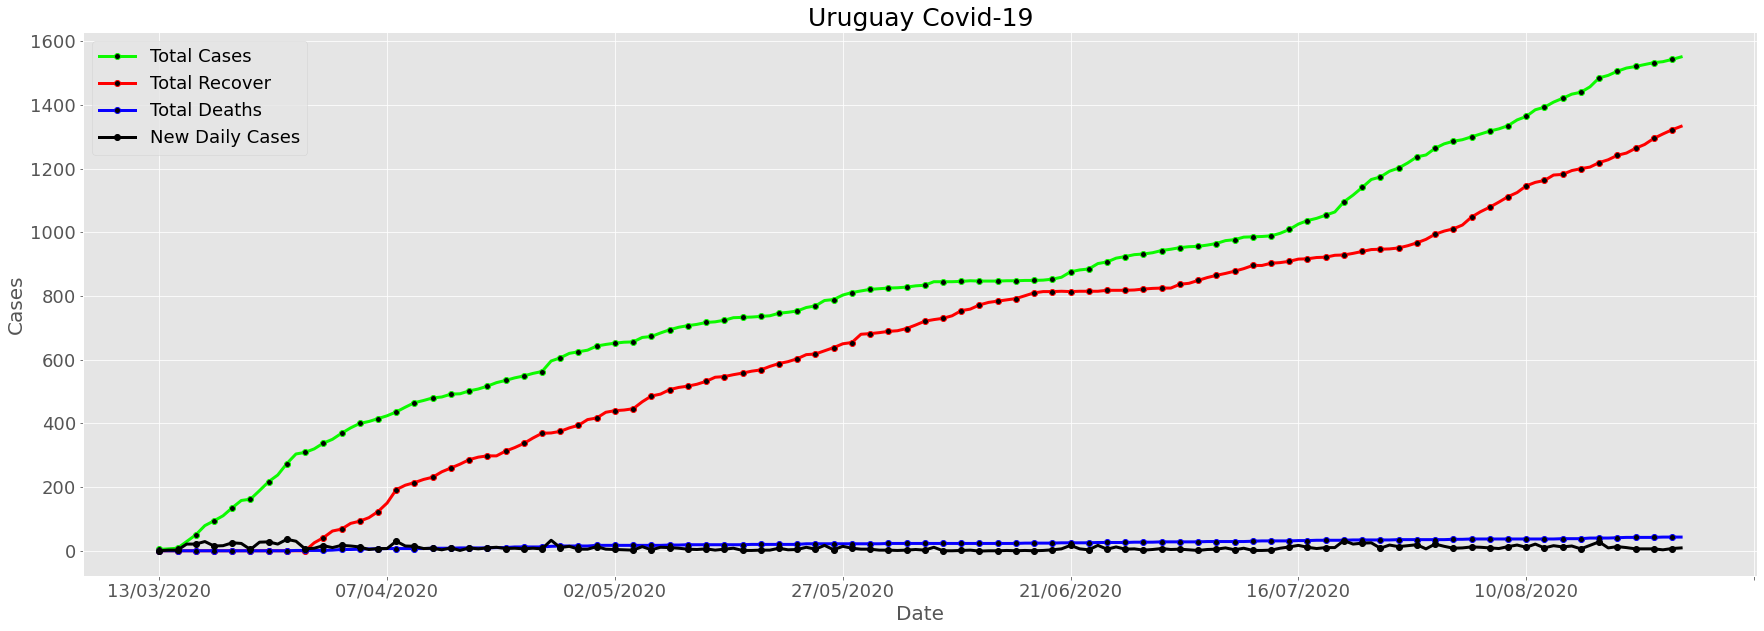

In [10]:
#Plotting Total 
pal = ["#0dfa00", "#ff0000", "#0800ff", "#000000" ]
df_T.plot(kind='line',
          figsize=(30,10),
          color=pal,
          linewidth=3,
          fontsize=18,
          linestyle='-',
          markevery=2, 
          marker='o',
          markerfacecolor='black')
        
plt.xlabel('Date',fontsize=20)
plt.ylabel('Cases' , fontsize=20)
plt.legend(fontsize=18)
plt.title('Uruguay Covid-19' , fontsize=25)


In [11]:
#Bar char of category df
df_b = df_U[['acumCasos','acumRecuperados','cantPersonasConInfeccionEnCurso','acumFallecidos','cantCasosNuevos']]
df_b.head()
df_b= df_b.rename(columns={'acumCasos':'Positive ','acumRecuperados':'Recover','acumFallecidos':'Deaths',
                       'cantCasosNuevos':'Daily','cantPersonasConInfeccionEnCurso':'Active'} )


Text(0.5, 1.0, 'Uruguay Covid-19 - Cases by Category , 25 August')

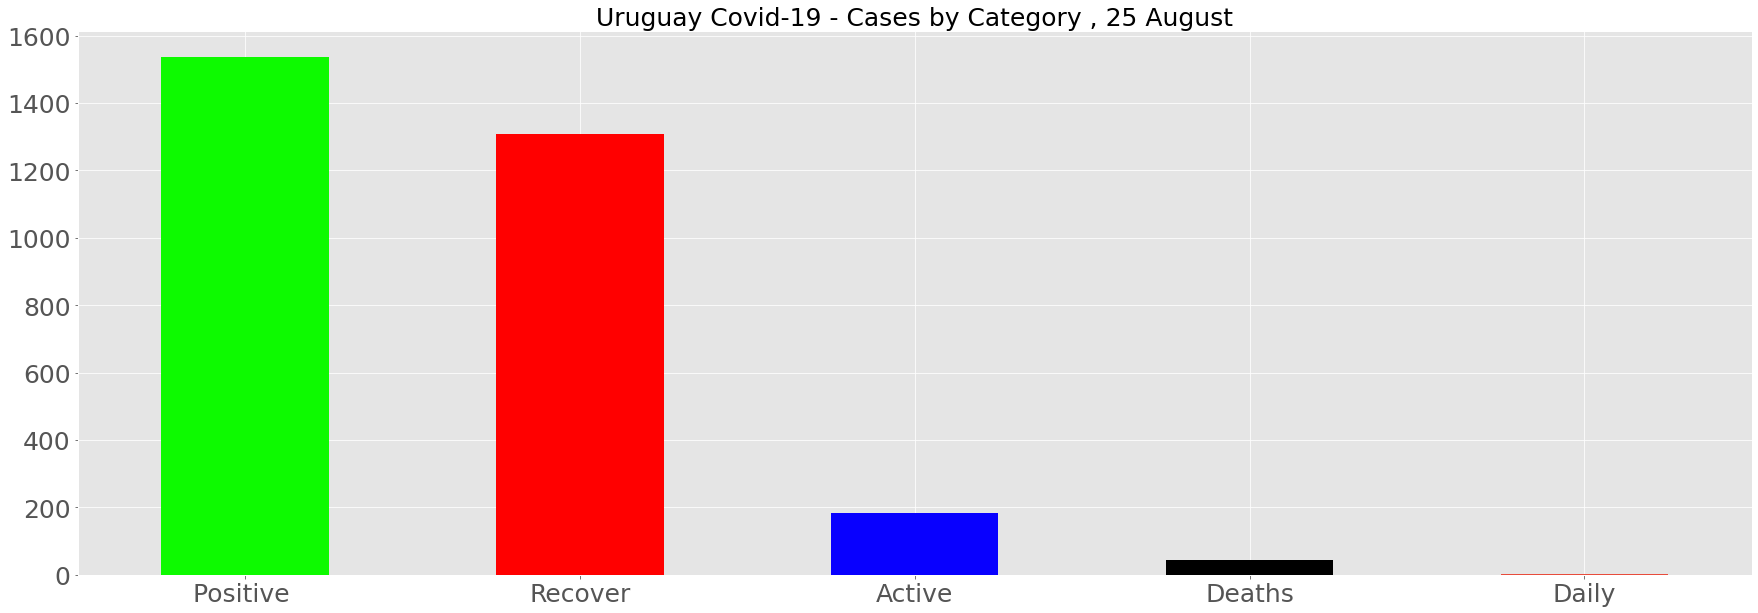

In [12]:
#Bar char of category Plotting
ig, ax = plt.subplots()
tRow=df_b.iloc[165]
pal = ["#0dfa00", "#ff0000", "#0800ff", "#000000" ,"#e74c3c"]
tRow.plot(kind='bar',
          figsize=(30,10),
          color=pal,
          fontsize=25)
ax.tick_params(labelrotation=0)
plt.title('Uruguay Covid-19 - Cases by Category , 25 August' , fontsize=25)

In [13]:
#New Cases against Recover df
df_nR = df_U[['fecha','cantCasosNuevos','cantRecuperados']]
 
df_nR= df_nR.rename(columns={'fecha':'Date','cantCasosNuevos':'New Cases','cantRecuperados':'Recover'})
df_nR= df_nR.set_index('Date')


Text(0.5, 1.0, 'Uruguay Covid-19 - New cases & Recover ')

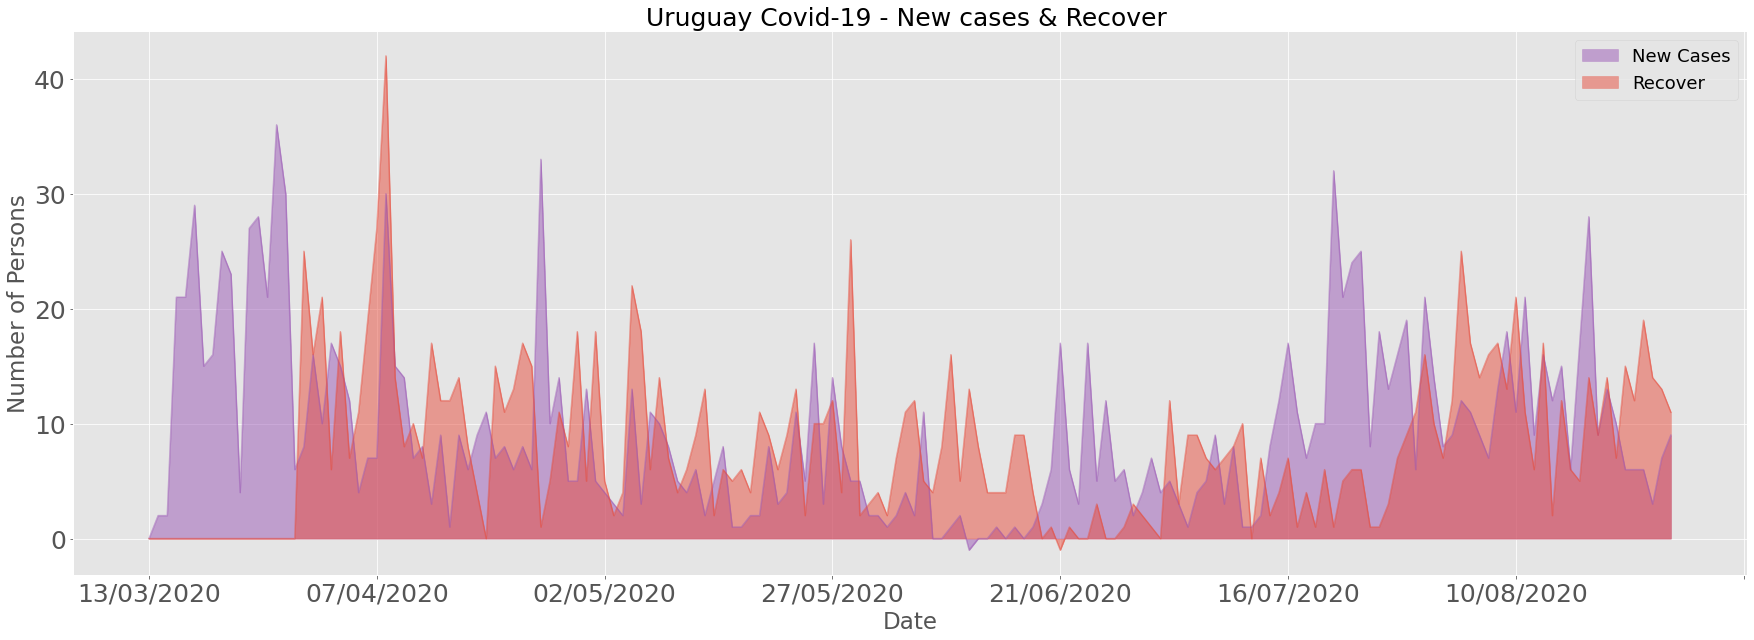

In [14]:
#Plotting New, recover, 
pal = ["#9b59b6", "#e74c3c"]
df_nR.plot(kind='area',
        stacked=False,
        figsize=(30,10),
        color=pal,
        fontsize=25,
       )
        
plt.xlabel('Date',fontsize=23)
plt.ylabel('Number of Persons' , fontsize=23)
plt.legend(fontsize=18)
plt.title('Uruguay Covid-19 - New cases & Recover ' , fontsize=25)



In [15]:
#Test df
df_t = df_U[['fecha','cantTest','cantTestPositivos']]
df_t= df_t.rename(columns={'fecha':'Date','cantTestPositivos':' Positive Test','cantTest':'Test Perform'})
df_t= df_t.set_index('Date')

Text(0.5, 1.0, 'Uruguay Covid-19 - Tests Performed & Positive Tests')

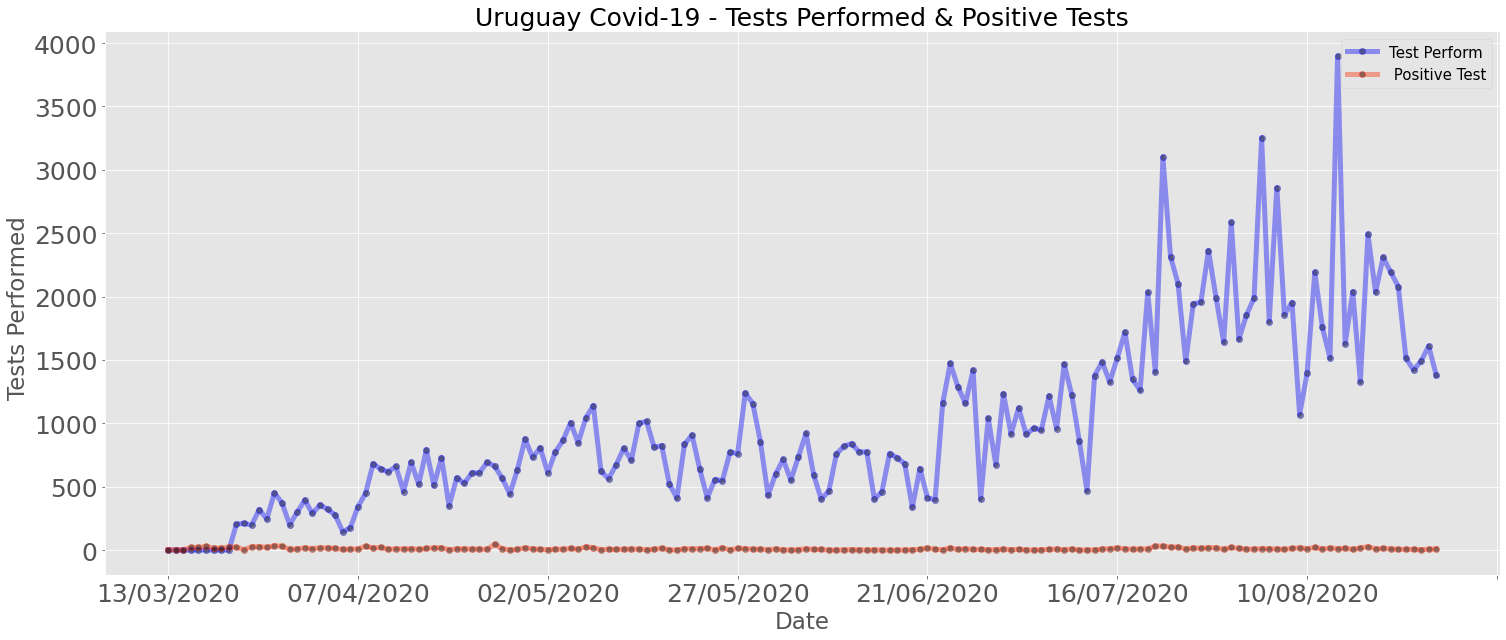

In [16]:
#Plotting Tests
pal = ["#0202f7", "#f72b02"]
df_t.plot(kind='line',
        figsize=(25,10),
        alpha=0.4,
        color=pal,
        fontsize=25,
        linewidth=5,
         linestyle='-',
          markevery=1, 
          marker='o',
          markerfacecolor='black',
       
        )
        
plt.xlabel('Date',fontsize=23)
plt.ylabel('Tests Performed ', fontsize=23)
plt.legend(fontsize=15)
plt.title('Uruguay Covid-19 - Tests Performed & Positive Tests',fontsize=25)

In [17]:
#Positive Test df
df_te = df_U[['fecha','cantTestPositivos']]
df_te= df_te.rename(columns={'cantTestPositivos':' Positive Test','fecha':'Date'})
df_te = df_te.fillna(0)
df_te= df_te.set_index('Date')

Text(0.5, 1.0, 'Uruguay Covid-19  - Positive Tests')

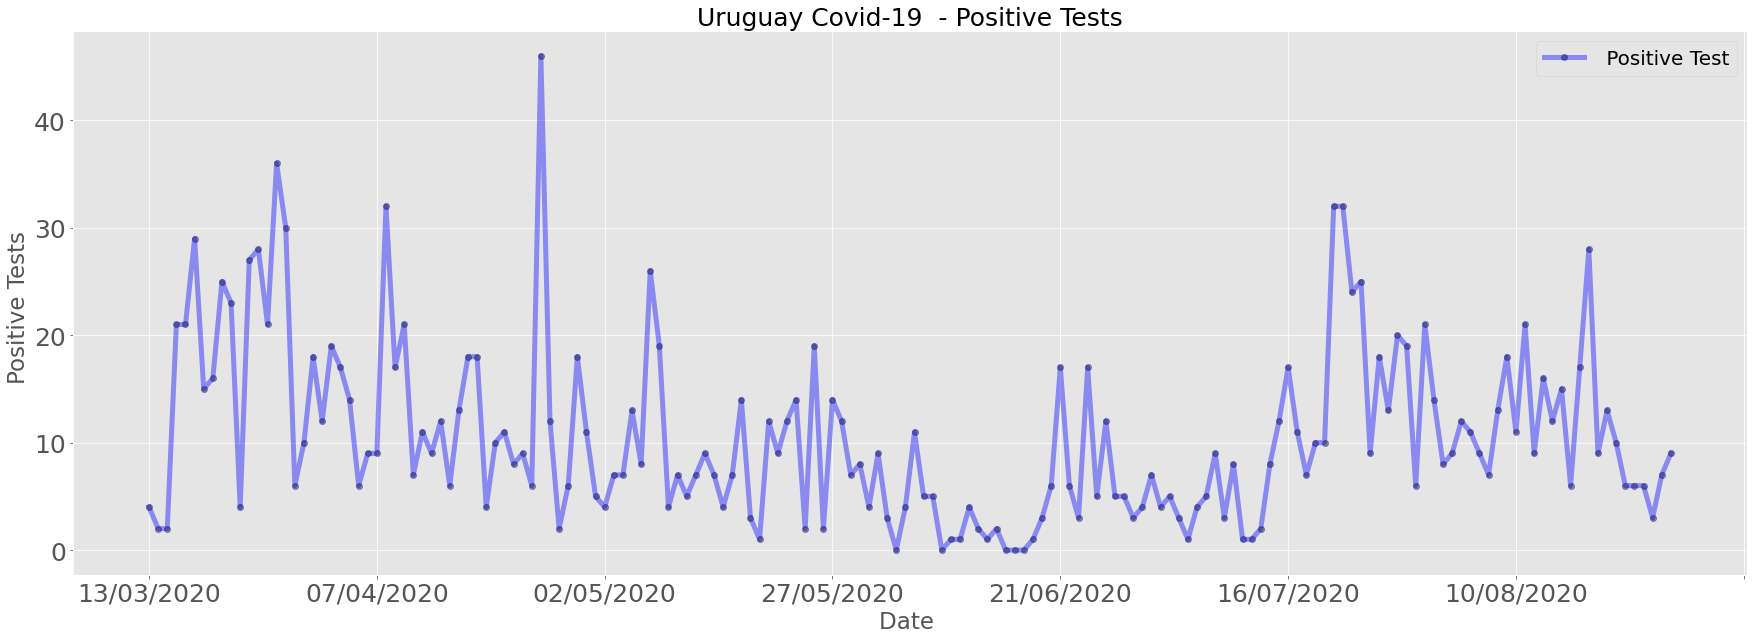

In [18]:
#Plotting Positive

df_te.plot(kind='line',
        figsize=(30,10),
        alpha=0.4,
        color='Blue',
        fontsize=25,
        linewidth=5,
         linestyle='-',
          markevery=1, 
          marker='o',
          markerfacecolor='black'
                
        )
        
plt.xlabel('Date ',fontsize=23)
plt.ylabel('Positive Tests ',fontsize=23)
plt.legend(fontsize=20)
plt.title('Uruguay Covid-19  - Positive Tests',fontsize=25)



In [19]:
#Death df
df_d = df_U[['fecha','cantFallecidos']]
df_d = df_d.rename(columns={'cantFallecidos':' Deaths','fecha':'Date'})
df_d = df_d.fillna(0)
df_d = df_d.set_index('Date')


Text(0.5, 1.0, 'Uruguay Covid-19  - Deaths')

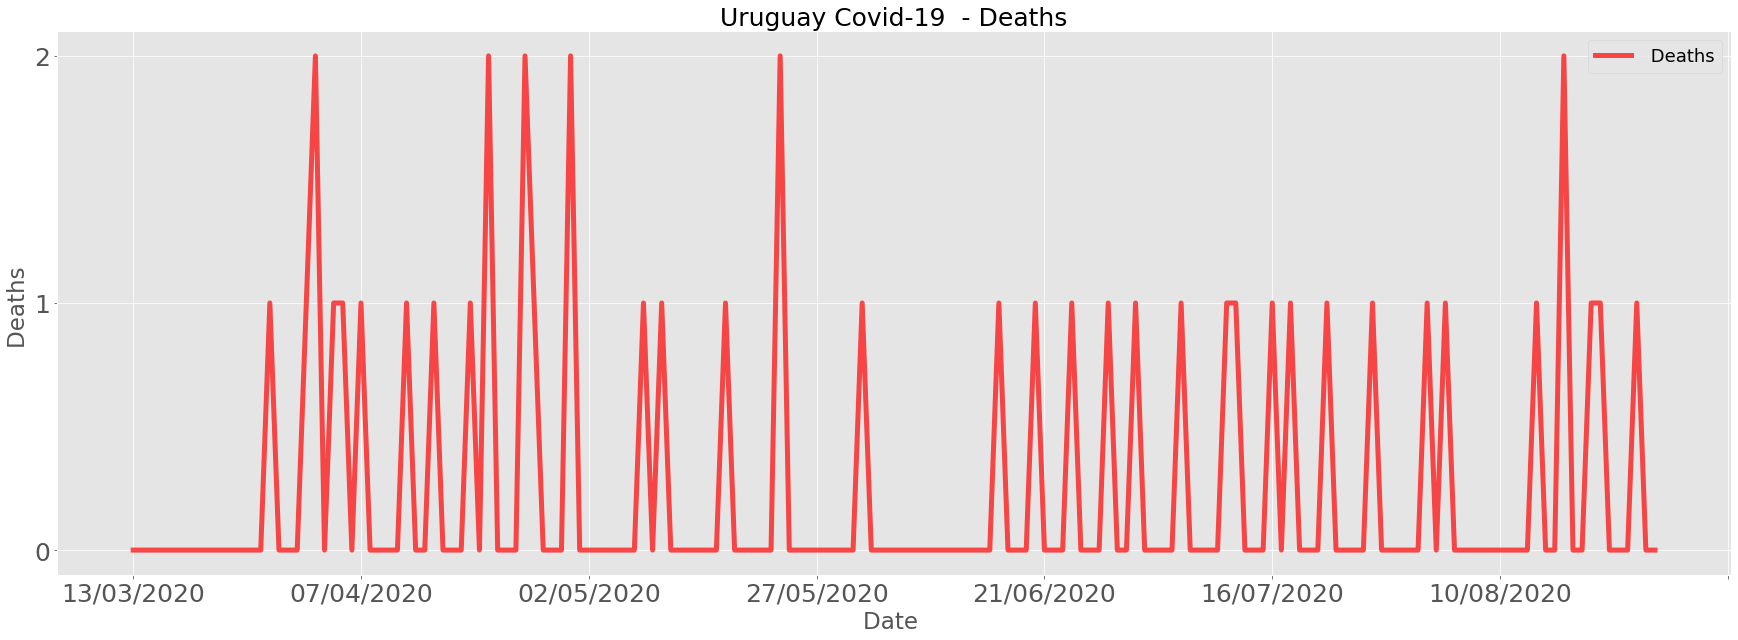

In [20]:
#Plotting Deaths
fig, ax = plt.subplots()

df_d.plot(kind='line',
        figsize=(30,10),
        color='red',
        alpha=0.7,
        fontsize=25,
        linewidth=5,
        ax=ax)

#ax.grid(linestyle='-',color='lightblue')  
ax.yaxis.set_major_locator(plt.MultipleLocator())

plt.xlabel('Date ',fontsize=23)
plt.ylabel('Deaths ',fontsize=23)
plt.legend(fontsize=18)
plt.title('Uruguay Covid-19  - Deaths',fontsize=25)